In [222]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn .decomposition import PCA
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# t-SNE

## houses

### basic

In [2]:
houses = pd.read_csv('../features_for_quiz/houses/classes.csv')

In [3]:
X = houses.drop(columns='class')
y = houses['class']

In [4]:
tsne_houses = TSNE(perplexity=3, init='random', n_iter=1_000_000, random_state=4)
X_embedded = pd.DataFrame(tsne_houses.fit_transform(X), columns=tsne_houses.get_feature_names_out())

In [5]:
X_embedded.head()

,tsne0,tsne1
0,-5.504042,33.385960
1,2.205146,38.268852
2,-4.828977,44.812504
3,-14.572426,-74.136513
4,-12.922813,-64.042755


In [6]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 'x', '*', '2']

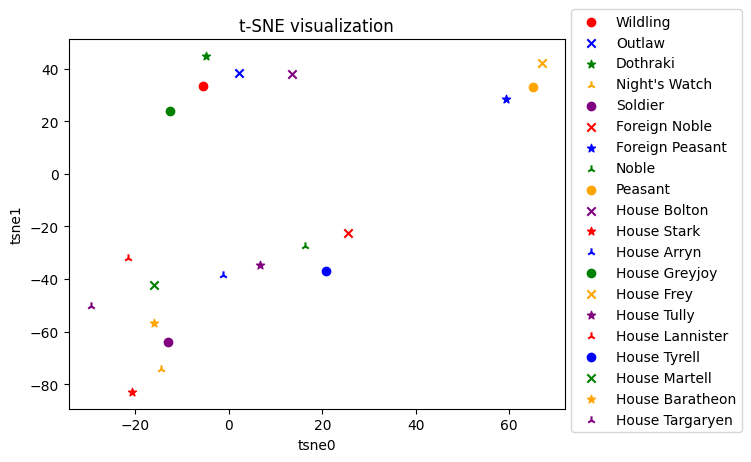

In [7]:
plt.figure()
c = 0
s = 0
for i in range(len(X_embedded)):
    plt.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], c=colors[c%5], marker=markers[s%4], label=y[i])
    c += 1
    s += 1
plt.legend(bbox_to_anchor=(1, 1.1))
plt.title('t-SNE visualization')
plt.xlabel('tsne0')
plt.ylabel('tsne1')
plt.show()

In [8]:
# plt.figure()
# sns.scatterplot(data = pd.DataFrame(X_embedded), x = 'tsne0', y = 'tsne1', hue=y);
# plt.legend(bbox_to_anchor=(1.1, 1.05));

### new character

In [205]:
new_character = {
    'outcast': [1],
    'climate': [1],
    'empathy': [4],
    'fighting': [2],
    'honor': [4],
    'connections': [3],
    'unyielding': [3]
}
new_X = pd.DataFrame.from_dict(new_character)
new_X

,outcast,climate,empathy,fighting,honor,connections,unyielding
0,1,1,4,2,4,3,3


In [206]:
outcasts = houses[houses['outcast']==1]
X_outcasts = outcasts.drop(columns='class')
y_outcasts = outcasts['class']

not_outcasts = houses[houses['outcast']==0]
X_not_outcasts = not_outcasts.drop(columns='class')
y_not_outcasts = not_outcasts['class']

In [212]:
if new_character['outcast'][0]:
    model = pickle.load(open('../got_survival/models_pickle/outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_outcasts, pd.Series('You'))).reset_index(drop=True)
else:
    model = pickle.load(open('../got_survival/models_pickle/not_outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_not_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_not_outcasts, pd.Series('You'))).reset_index(drop=True)
    
model_all = pickle.load(open('../got_survival/models_pickle/houses.pkl', 'rb'))

In [216]:
X_with_new = pd.concat((X, new_X)).reset_index(drop=True)
y_with_new = pd.concat((y, pd.Series('You'))).reset_index(drop=True)

In [217]:
tsne_new = TSNE(n_components=2, perplexity=3, init='random', n_iter=1_000_000, random_state=4)
X_with_new_emb = pd.DataFrame(tsne_new.fit_transform(X_with_new), columns=tsne_new.get_feature_names_out())

In [218]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 'x', '*', '2']

Peasant
House Tully


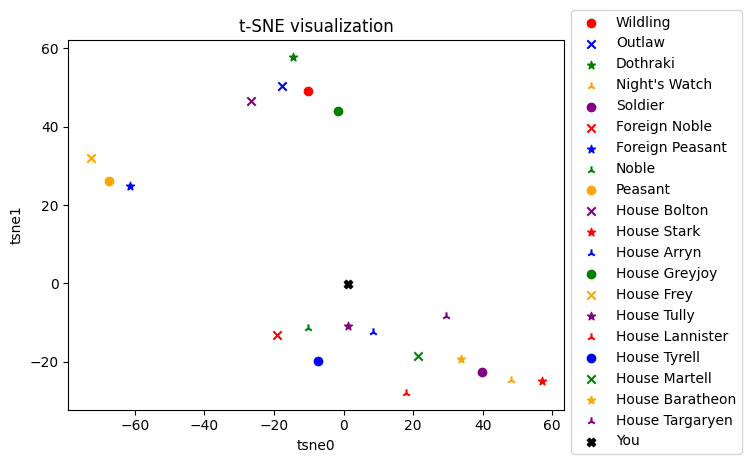

In [219]:
print(model.predict(new_X)[0])
print(model_all.predict(new_X)[0])
plt.figure()
c = 0
s = 0
n = 0
for i in range(len(X_with_new_emb)-1):
    plt.scatter(X_with_new_emb.loc[i][0], X_with_new_emb.loc[i][1], c=colors[c%5], 
                marker=markers[s%4], label=y_with_new[i])
    c += 1
    s += 1
    n += 1
plt.scatter(X_with_new_emb.iloc[-1][0], X_with_new_emb.iloc[-1][1], c='black', 
            marker='X', label=y_with_new.iloc[-1])
plt.legend(bbox_to_anchor=(1, 1.1))
plt.title('t-SNE visualization')
plt.xlabel('tsne0')
plt.ylabel('tsne1')
plt.show()

In [326]:
fig = px.scatter(x=X_with_new_emb.iloc[:20, 0], y=X_with_new_emb.iloc[:20, 1], text=y_with_new[:20], 
                 color=y_with_new[:20], size=pd.Series([10]*20))
fig.update_traces(mode='markers', hovertemplate="%{text}")
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.add_scatter(x=X_with_new_emb.iloc[-1:, 0], y=X_with_new_emb.iloc[-1:, 1], hovertemplate='You', name='You', 
                showlegend=False, marker=dict(size=25, color="Red", symbol='x'))

## characters

In [10]:
char = pd.read_csv('../processed_data/cleaned_data_final.csv')
char.drop(columns=['name', 'season', 'episode', 'deaths', 'episode_num'], inplace=True)

In [11]:
char

,male,origin,isMarried,isNoble,popularity,isAlive
0,1,House Targaryen,0,0,0.605351,0
1,1,House Frey,1,1,0.896321,0
2,1,House Lannister,0,1,0.267559,1
3,0,House Arryn,1,1,0.183946,0
4,0,House Martell,1,1,0.043478,1
...,...,...,...,...,...,...
1944,1,House Stark,0,0,0.351171,0
1945,1,House Bolton,0,0,0.096990,0
1946,1,Dothraki,0,0,0.030100,1
1947,1,Peasant,0,0,0.130435,1


In [12]:
X = char.drop(columns='isAlive')
y = char['isAlive']

In [13]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder='passthrough'
)

In [14]:
X_proc = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

In [15]:
X_proc

,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,cat_transformer__origin_House Lannister,cat_transformer__origin_House Martell,...,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,remainder__male,remainder__isMarried,remainder__isNoble,remainder__popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.605351
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.896321
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.267559
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.183946
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.351171
1945,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096990
1946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030100
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.130435


In [16]:
tsne_char = TSNE(n_components=3, perplexity=3)
X_embedded = pd.DataFrame(tsne_char.fit_transform(X_proc), columns=tsne_char.get_feature_names_out())

In [17]:
X_embedded

,tsne0,tsne1,tsne2
0,5.807065,-16.204639,4.598165
1,8.041245,4.071449,28.133715
2,7.051956,-1.665242,8.865382
3,18.130949,26.600466,9.595862
4,17.232811,19.710245,-3.807487
...,...,...,...
1944,-0.739307,-21.155859,14.484252
1945,-6.321545,-1.785857,2.186027
1946,-1.894906,-34.165276,12.478045
1947,-3.912335,-4.131952,10.527620


In [18]:
# %matplotlib notebook
# 
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# for i in range(len(X_embedded)):
#     ax.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], X_embedded.loc[i][1], color=f'{y[i]}')
#     
# # plt.legend(bbox_to_anchor=(1, 1.1))
# # plt.title('t-SNE visualization')
# # plt.xlabel('tsne0')
# # plt.ylabel('tsne1')
# plt.show()

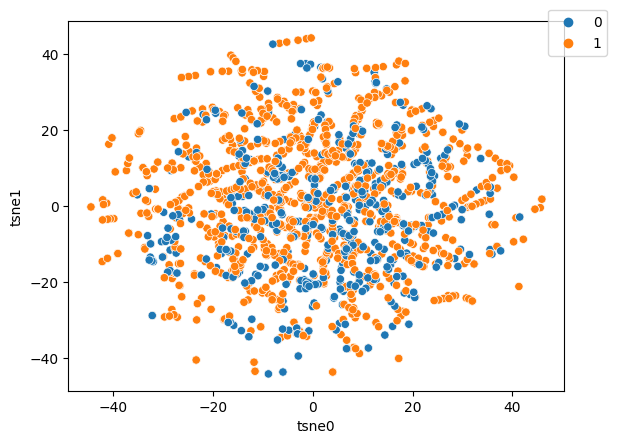

In [19]:
plt.figure()
sns.scatterplot(data = pd.DataFrame(X_embedded), x = 'tsne0', y = 'tsne1', hue=y);
plt.legend(bbox_to_anchor=(1.1, 1.05));

In [20]:
# plt.figure()
# c = 0
# s = 0
# for i in range(len(X_embedded)):
#     plt.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], c=colors[c%5], marker=markers[s%4], label=y[i])
#     c += 1
#     s += 1
# plt.legend(bbox_to_anchor=(1, 1.1))
# plt.title('t-SNE visualization')
# plt.xlabel('tsne0')
# plt.ylabel('tsne1')
# plt.show()

# PCA

## houses

### basic

In [112]:
houses = pd.read_csv('../features_for_quiz/houses/classes.csv')

In [113]:
X = houses.drop(columns='class')
y = houses['class']

In [114]:
pca = PCA()
pca.fit(X);

In [115]:
X_proj = pca.transform(X)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 8)])

In [116]:
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.985136,2.866664,0.034861,-0.086859,-0.623969,-0.501284,-0.316013
1,2.082176,2.156305,0.770424,0.697594,-0.413761,-0.306130,-0.085360
2,0.886056,2.379620,1.002561,0.434444,0.566026,0.846680,0.242267
3,-1.896651,0.961004,-1.591474,-0.392326,-0.715845,0.631953,-0.134835
4,-1.279327,0.753086,-0.779973,0.115386,0.083419,0.552090,-0.015773
5,0.545200,-2.540128,0.703402,-0.319196,0.285555,-0.075076,-0.064539
6,2.782445,-0.921189,-0.484847,1.661639,0.194450,0.097531,-0.058875
7,-0.317694,-1.796693,0.245629,-0.287540,-0.927261,-0.022875,0.071516
8,3.019321,-1.247622,-1.299145,0.704655,0.076314,-0.387047,-0.157156
9,1.838994,0.038925,1.567591,-0.386098,-0.976342,-0.240525,0.486391


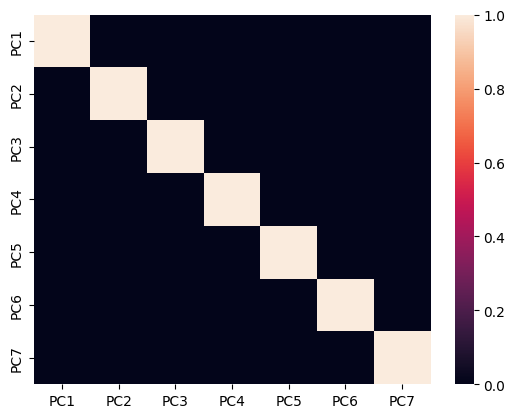

In [117]:
sns.heatmap(X_proj.corr());

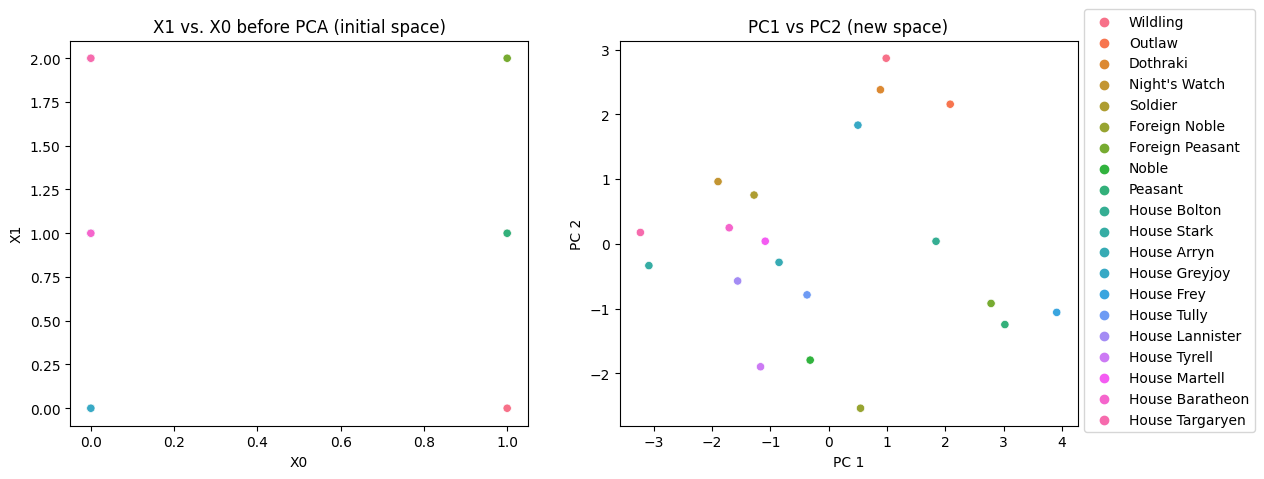

In [119]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
sns.scatterplot(data=X, x=X.iloc[:,0], y=X.iloc[:,1], hue=y, legend=False)


plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
sns.scatterplot(data=X_proj, x=X_proj.iloc[:,0], y=X_proj.iloc[:,1], hue=y)
plt.legend(bbox_to_anchor=(1, 1.1))

plt.show()

### new character

In [181]:
new_character = {
    'outcast': [0],
    'climate': [1],
    'empathy': [3],
    'fighting': [2],
    'honor': [4],
    'connections': [2],
    'unyielding': [4]
}
new_X = pd.DataFrame.from_dict(new_character)
new_X

,outcast,climate,empathy,fighting,honor,connections,unyielding
0,0,1,3,2,4,2,4


In [182]:
outcasts = houses[houses['outcast']==1]
X_outcasts = outcasts.drop(columns='class')
y_outcasts = outcasts['class']

not_outcasts = houses[houses['outcast']==0]
X_not_outcasts = not_outcasts.drop(columns='class')
y_not_outcasts = not_outcasts['class']

In [183]:
if new_character['outcast'][0]:
    model = pickle.load(open('../got_survival/models_pickle/outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_outcasts, pd.Series('You'))).reset_index(drop=True)
else:
    model = pickle.load(open('../got_survival/models_pickle/not_outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_not_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_not_outcasts, pd.Series('You'))).reset_index(drop=True)
    
model_all = pickle.load(open('../got_survival/models_pickle/houses.pkl', 'rb'))

In [184]:
X_proj_with_new = pca.transform(X_with_new)
X_proj_with_new = pd.DataFrame(X_proj_with_new, columns=[f'PC{i}' for i in range(1, 8)])

In [185]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 'x', '*', '2']

House Arryn
House Arryn


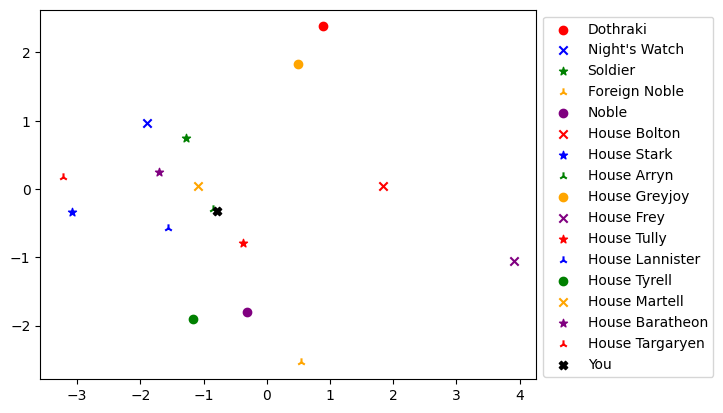

In [186]:
print(model.predict(new_X)[0])
print(model_all.predict(new_X)[0])
plt.figure()
c = 0
s = 0
n = 0
for i in range(len(X_proj_with_new)-1):
    plt.scatter(X_proj_with_new.loc[i][0], X_proj_with_new.loc[i][1], c=colors[c%5], 
                marker=markers[s%4], label=y_with_new[i])
    c += 1
    s += 1
    n += 1
plt.scatter(X_proj_with_new.iloc[-1][0], X_proj_with_new.iloc[-1][1], c='black', 
            marker='X', label=y_with_new.iloc[-1])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

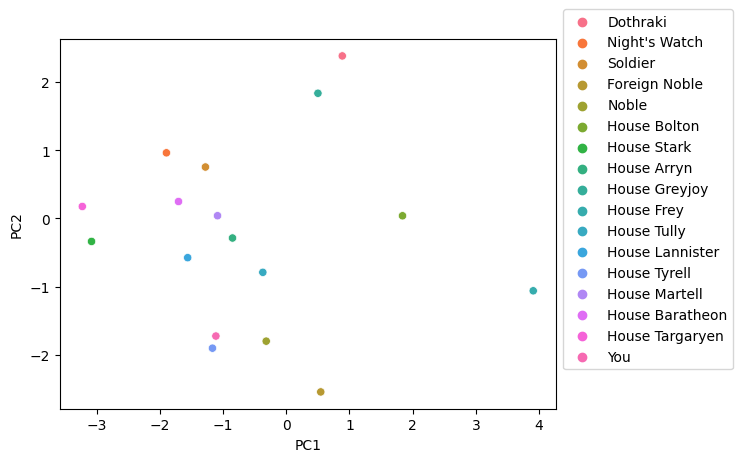

In [143]:
plt.figure()

sns.scatterplot(data=X_proj_with_new, x=X_proj_with_new.iloc[:,0], y=X_proj_with_new.iloc[:,1], hue=y_with_new,
               markers=['o', 'x', '*', '2'])
plt.legend(bbox_to_anchor=(1, 1.1))

plt.show()

## characters

In [2]:
char = pd.read_csv('../processed_data/cleaned_data_final.csv')
char.drop(columns=['name', 'season', 'episode', 'deaths', 'episode_num'], inplace=True)

In [3]:
X = char.drop(columns='isAlive')
y = char['isAlive']

In [4]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder='passthrough'
)

In [5]:
X_processed = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

In [6]:
pca = PCA()
pca.fit(X_processed);

In [7]:
X_proj = pca.transform(X_processed)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 25)])

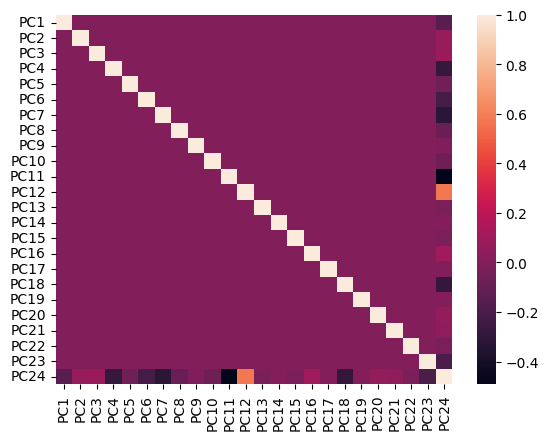

In [8]:
sns.heatmap(X_proj.corr());

In [45]:
X_proc

,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,cat_transformer__origin_House Lannister,cat_transformer__origin_House Martell,...,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,remainder__male,remainder__isMarried,remainder__isNoble,remainder__popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.605351
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.896321
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.267559
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.183946
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.351171
1945,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096990
1946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030100
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.130435


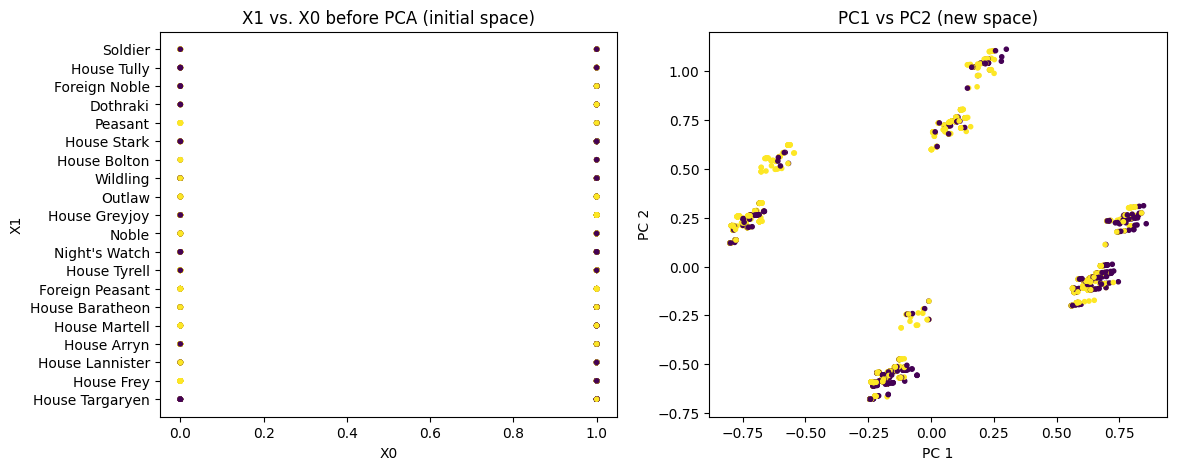

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, marker='.')

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y, marker='.');

In [12]:
X_processed

,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,cat_transformer__origin_House Lannister,cat_transformer__origin_House Martell,...,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,remainder__male,remainder__isMarried,remainder__isNoble,remainder__popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.605351
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.896321
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.267559
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.183946
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.351171
1945,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096990
1946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030100
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.130435


# visualization

In [106]:
new_character = {
    'outcast': [0],
    'climate': [1],
    'empathy': [4],
    'fighting': [2],
    'honor': [4],
    'connections': [3],
    'unyielding': [3]
}
new_X = pd.DataFrame.from_dict(new_character)
new_X

,outcast,climate,empathy,fighting,honor,connections,unyielding
0,0,1,4,2,4,3,3


In [107]:
outcasts = houses[houses['outcast']==1]
X_outcasts = outcasts.drop(columns='class')
y_outcasts = outcasts['class']

not_outcasts = houses[houses['outcast']==0]
X_not_outcasts = not_outcasts.drop(columns='class')
y_not_outcasts = not_outcasts['class']

In [108]:
if new_character['outcast'][0]:
    model = pickle.load(open('../got_survival/models_pickle/outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_outcasts, pd.Series('You'))).reset_index(drop=True)
else:
    model = pickle.load(open('../got_survival/models_pickle/not_outcasts.pkl', 'rb'))
    X_with_new = pd.concat((X_not_outcasts, new_X)).reset_index(drop=True)
    y_with_new = pd.concat((y_not_outcasts, pd.Series('You'))).reset_index(drop=True)
    
model_all = pickle.load(open('../got_survival/models_pickle/houses.pkl', 'rb'))

In [111]:
model.predict_proba(new_X)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])